## Radiative/Adibatic cooling ratio. Section 5 of the paper, Fig. 5  and Fig. 6

beta 0.001 time_max 111.51041666666667 gamma 74.62478494036449 B 0.07482083888770043 R 1.3365260465749564 t_ad4.458171e+08 t_s3.728848e+10 t_S/t_ad 8.364076e+01
beta 0.001 time_max 1 167.265625 gamma 1 85.87241490049148 B 1 0.05650428785623807 R 1 1.7697771938021163 t_ad5.903341e+08 t_s3.240298e+10 t_S/t_ad 5.488923e+01
beta 0.002 time_max 68.24729938271605 gamma 77.53991991977583 B 0.06930077030499193 R 1.4429854034796596 t_ad2.553910e+08 t_s3.588610e+10 t_S/t_ad 1.405144e+02
beta 0.002 time_max 1 102.37094907407408 gamma 1 89.97063056466486 B 1 0.051473918401526014 R 1 1.9427314474088175 t_ad3.438400e+08 t_s3.092661e+10 t_S/t_ad 8.994477e+01
beta 0.004 time_max 39.907407407407405 gamma 78.92518209524971 B 0.06688944202000761 R 1.4950042485043982 t_ad1.403946e+08 t_s3.525598e+10 t_S/t_ad 2.511207e+02
beta 0.004 time_max 1 59.86111111111111 gamma 1 92.31253404192101 B 1 0.04889533350056117 R 1 2.045184945897798 t_ad1.920616e+08 t_s3.014179e+10 t_S/t_ad 1.569381e+02
beta 0.007 time_max 

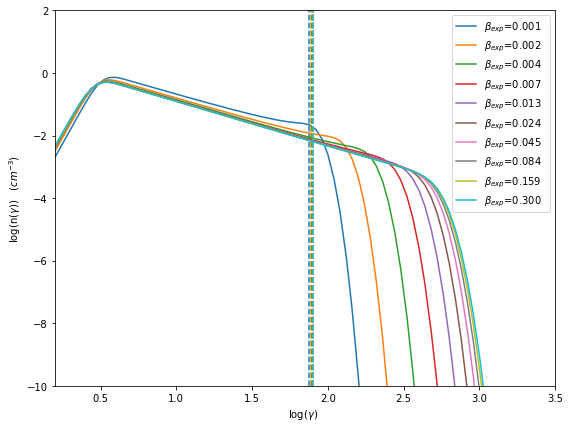

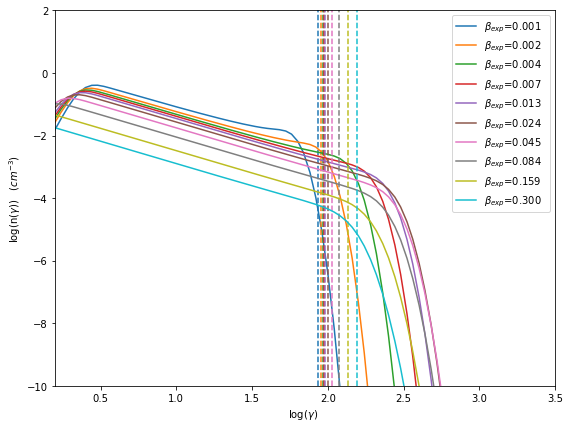

In [5]:
from jetset.jet_timedep import JetTimeEvol
from jetset.jetkernel.jetkernel import Sync_tcool

import glob
file_list=glob.glob('temp_ev_sim_exp_change_beta/temp_ev_expansion_beta_exp=*.pkl')
file_list.sort()
p=None
p1=None

B=np.zeros(len(file_list))
R=np.zeros(len(file_list))
gamma=np.zeros(len(file_list))
t_max=np.zeros(len(file_list))
t_ad=np.zeros(len(file_list))
t_S=np.zeros(len(file_list))
beta_exp=np.zeros(len(file_list))

B_1=np.zeros(len(file_list))
R_1=np.zeros(len(file_list))
gamma_1=np.zeros(len(file_list))
t_ad_1=np.zeros(len(file_list))
t_S_1=np.zeros(len(file_list))
t_factor=1.5

for ID,f in enumerate(file_list):
    temp_ev=JetTimeEvol.load_model(f)
    beta_exp[ID]=temp_ev.parameters.beta_exp_R.val
    nu1=15*1E9
    beaming=temp_ev.rad_region.jet.parameters.beam_obj.val
    lr=temp_ev.rad_region.make_lc(nu1=nu1,name='radio_%dGHz'%nu1,eval_cross_time=False,delta_t_out=1000,use_cached=True,frame='blob')
    t_max[ID]=lr['time'][np.argmax(lr['flux'])]
    temp_ev.rad_region.set_time(time=t_max[ID],frame='blob')
    p=temp_ev.rad_region.jet.emitters_distribution.plot(label=r'$\beta_{exp}$=%3.3f  '%beta_exp[ID],p=p)
    B[ID]=temp_ev.rad_region.jet.parameters.B.val
    gamma[ID]=np.sqrt(nu1/(temp_ev.rad_region.jet.parameters.beam_obj.val*1.2E6*B[ID]))
    R[ID]=temp_ev.rad_region.jet.parameters.R.val/1E16
    t_ad[ID]=temp_ev._get_adiab_cooling_time_from_R(R[ID]*1E16)
    t_S[ID]=Sync_tcool(temp_ev.rad_region.jet._blob, gamma[ID])
    p.ax.axvline(np.log10(gamma[ID]),color='C%d'%ID,ls='--')
    print("beta %3.3f"%beta_exp[ID],"time_max",t_max[ID]/86400/beaming,"gamma",gamma[ID],"B",B[ID],"R",R[ID],"t_ad%e"%t_ad[ID],"t_s%e"%t_S[ID],"t_S/t_ad %e"%(t_S[ID]/t_ad[ID]))
    
    tmax_1=min(lr['time'][np.argmax(lr['flux'])]*t_factor,temp_ev.parameters.duration.val*0.99)
    temp_ev.rad_region.set_time(time=tmax_1,frame='blob')
    p1=temp_ev.rad_region.jet.emitters_distribution.plot(label=r'$\beta_{exp}$=%3.3f  '%beta_exp[ID],p=p1)
    B_1[ID]=temp_ev.rad_region.jet.parameters.B.val
    gamma_1[ID]=np.sqrt(nu1/(temp_ev.rad_region.jet.parameters.beam_obj.val*1.2E6*B_1[ID]))
    R_1[ID]=temp_ev.rad_region.jet.parameters.R.val/1E16
    t_ad_1[ID]=temp_ev._get_adiab_cooling_time_from_R(R_1[ID]*1E16)
    t_S_1[ID]=Sync_tcool(temp_ev.rad_region.jet._blob, gamma_1[ID])
    p1.ax.axvline(np.log10(gamma_1[ID]),color='C%d'%ID,ls='--')
    print("beta %3.3f"%beta_exp[ID],"time_max 1",tmax_1/86400/beaming,"gamma 1",gamma_1[ID],"B 1",B_1[ID],"R 1",R_1[ID],"t_ad%e"%t_ad_1[ID],"t_s%e"%t_S_1[ID],"t_S/t_ad %e"%(t_S_1[ID]/t_ad_1[ID]))

    
    

p.rescale(y_min=-10,y_max=2,x_max=3.5,x_min=0.2)
p1.rescale(y_min=-10,y_max=2,x_max=3.5,x_min=0.2)



In [11]:
p.fig.set_size_inches(8,6)
p.fig.set_dpi(100)

p.fig.savefig('temp_ev_analysis_beta_exp_trends/emitters_evol.pdf')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

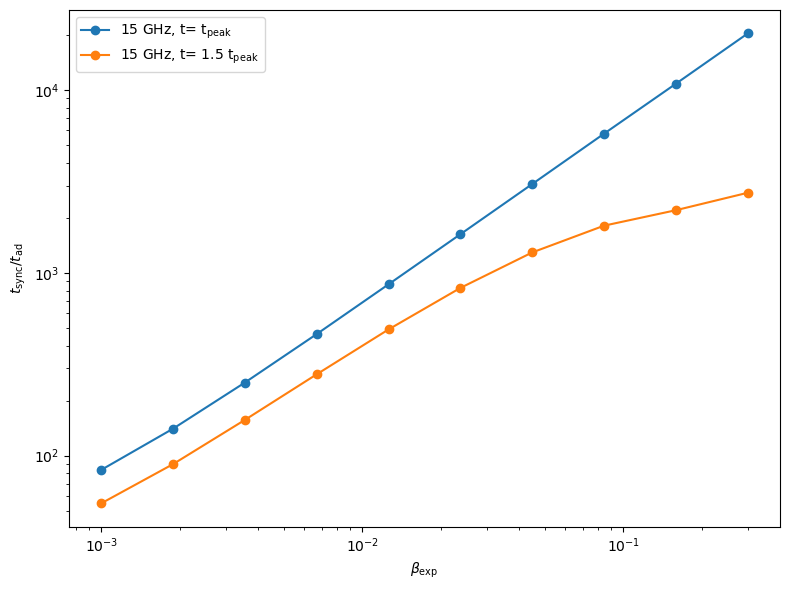

In [12]:
fig=plt.figure(dpi=100,figsize=(8,6))
ax=fig.add_subplot()
ax.loglog(beta_exp,t_S/t_ad,'o-',label=r'15 GHz, t= t$_{\rm peak}$')
ax.loglog(beta_exp,t_S_1/t_ad_1,'o-',label=r'15 GHz, t= %1.1f t$_{\rm peak}$'%t_factor)
ax.set_xlabel(r'$\beta_{\rm exp}$')
ax.set_ylabel(r'$t_{\rm sync}/t_{\rm ad}$')
ax.legend()
plt.tight_layout()

In [13]:
fig.savefig('temp_ev_analysis_beta_exp_trends/cooling_ratios.pdf')

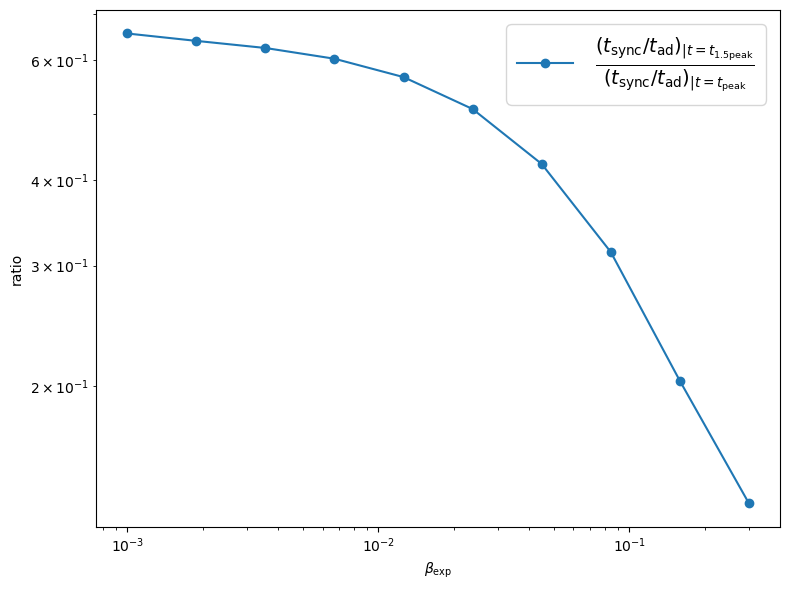

In [14]:
fig=plt.figure(dpi=100,figsize=(8,6))
ax=fig.add_subplot()
y1=t_S/t_ad
y2=t_S_1/t_ad_1
ax.loglog(beta_exp,y2/y1,'o-',label=r'$\frac{(t_{\rm sync}/t_{\rm ad})_{|t=t_{\rm %1.1f peak}}}{(t_{\rm sync}/t_{\rm ad})_{|t=t_{\rm peak}}}$'%t_factor)
ax.set_xlabel(r'$\beta_{\rm exp}$')
ax.set_ylabel('ratio')
ax.legend(fontsize=20)
plt.tight_layout()

In [15]:
fig.savefig('temp_ev_analysis_beta_exp_trends/cooling_ratios_time_tp_1.5tp.pdf')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>